In [53]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [54]:
import pandas as pd

In [55]:
datasets = pd.read_csv('/gdrive/My Drive/Colab Notebooks/FakeNewsPrediction/PhilippineFakeNewsCorpus.csv')

In [58]:
datasets.head()

,Headline,Content,Authors,Date,URL,Brand,Label
0,PH ranks 2nd in Asia-Pacific in deaths due to ...,Pollution caused by traditional cooking fuel i...,['Philippine Daily Inquirer'],NaN,https://newsinfo.inquirer.net/987262/ph-ranks-...,Inquirer,Credible
1,"Aguirre, PCSO chief deny plotting to kill ‘Ato...",Justice Secretary Vitaliano Aguirre 2nd and Ph...,['Jomar Canlas'],2017-04-28 20:12:54+00:00,https://www.manilatimes.net/aguirre-pcso-chief...,Manila Times,Credible
2,Duterte says charges vs ex-President will fail,President Rodrigo Duterte on Monday night desc...,['Christine O. Avendaño'],NaN,https://newsinfo.inquirer.net/914727/duterte-s...,Inquirer,Credible
3,Group warns BFAR on law enforcement fund,THE militant fisher folk group Pambansang Laka...,['Neil Alcober'],2017-08-12 19:54:48+00:00,https://www.manilatimes.net/group-warns-bfar-l...,Manila Times,Credible
4,Solon asks Duterte for jet ski to Panatag,Magdalo Rep. Gary Alejano is willing to lead t...,['Dj Yap'],NaN,https://newsinfo.inquirer.net/882744/solon-ask...,Inquirer,Credible


In [59]:
datasets.shape

(22458, 7)

In [62]:
datasets['Label'] = datasets['Label'].astype('category').cat.codes
datasets.drop('Date', axis=1, inplace=True)
datasets.drop('Authors', axis=1, inplace=True)
datasets.drop('URL', axis=1, inplace=True)
# 0 = Credible or True
# 1 = Not Crediblle or Fake

In [63]:
datasets.head()

,Headline,Content,Brand,Label
0,PH ranks 2nd in Asia-Pacific in deaths due to ...,Pollution caused by traditional cooking fuel i...,Inquirer,0
1,"Aguirre, PCSO chief deny plotting to kill ‘Ato...",Justice Secretary Vitaliano Aguirre 2nd and Ph...,Manila Times,0
2,Duterte says charges vs ex-President will fail,President Rodrigo Duterte on Monday night desc...,Inquirer,0
3,Group warns BFAR on law enforcement fund,THE militant fisher folk group Pambansang Laka...,Manila Times,0
4,Solon asks Duterte for jet ski to Panatag,Magdalo Rep. Gary Alejano is willing to lead t...,Inquirer,0


In [66]:
X = datasets. drop('Label', axis=1)
y = datasets['Label']

In [67]:
datasets = datasets.dropna()
df = datasets.copy()

df.reset_index(inplace=True)
df.head()

,index,Headline,Content,Brand,Label
0,0,PH ranks 2nd in Asia-Pacific in deaths due to ...,Pollution caused by traditional cooking fuel i...,Inquirer,0
1,1,"Aguirre, PCSO chief deny plotting to kill ‘Ato...",Justice Secretary Vitaliano Aguirre 2nd and Ph...,Manila Times,0
2,2,Duterte says charges vs ex-President will fail,President Rodrigo Duterte on Monday night desc...,Inquirer,0
3,3,Group warns BFAR on law enforcement fund,THE militant fisher folk group Pambansang Laka...,Manila Times,0
4,4,Solon asks Duterte for jet ski to Panatag,Magdalo Rep. Gary Alejano is willing to lead t...,Inquirer,0


In [68]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [69]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Content'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [71]:
X = tfidf_v.fit_transform(corpus).toarray()
y = df['Label']

In [72]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [74]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.940


In [76]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


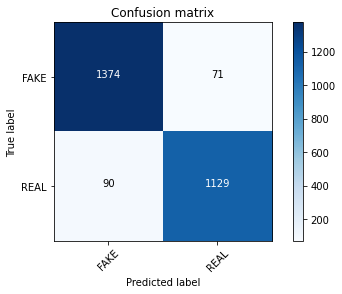

In [39]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [77]:
review = re.sub('[^a-zA-Z]', ' ', 'The dog is meow')
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'dog meow'

In [51]:
val = tfidf_v.transform([review]).toarray()

In [52]:
classifier.predict(val)

array([1], dtype=int8)

In [44]:
import pickle

In [45]:
pickle.dump(classifier, open('model2.pkl', 'wb'))

In [46]:
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))